<a href="https://colab.research.google.com/github/davideneffat/movie_recommendations/blob/main/movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd

# Download MovieLens dataset
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"   #la versione ridotta
zip_file = tf.keras.utils.get_file("ml-latest-small.zip", url, extract=True, cache_dir='./')
extracted_folder = zip_file.replace('.zip', '')

# Load ratings data into a Pandas DataFrame
ratings_file = extracted_folder + '/ratings.csv'
ratings_df = pd.read_csv(ratings_file)

# Display the first 10 rows
print("First 10 rows:")
print(ratings_df.head(10))

# Display the last 10 rows
print("\nLast 10 rows:")
print(ratings_df.tail(10))


First 10 rows:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
5       1       70     3.0  964982400
6       1      101     5.0  964980868
7       1      110     4.0  964982176
8       1      151     5.0  964984041
9       1      157     5.0  964984100

Last 10 rows:
        userId  movieId  rating   timestamp
100826     610   162350     3.5  1493849971
100827     610   163937     3.5  1493848789
100828     610   163981     3.5  1493850155
100829     610   164179     5.0  1493845631
100830     610   166528     4.0  1493879365
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415


In [ ]:
dataset = ratings_df
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(100836, 4)

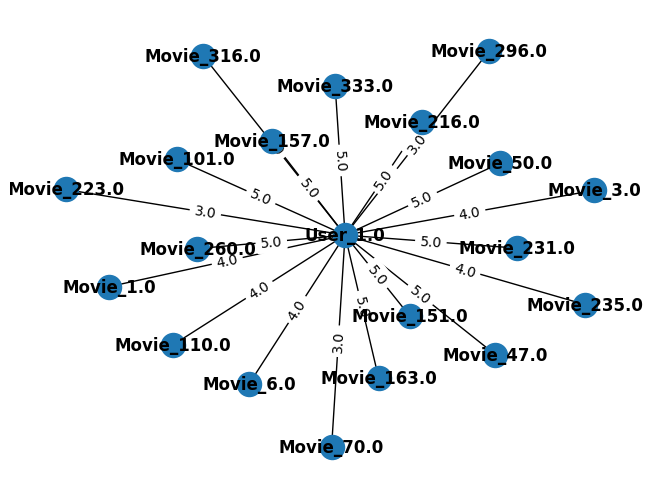

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes (users and movies) and edges (interactions)
for _, row in dataset.iterrows():
    user_id = f"User_{row['userId']}"
    movie_id = f"Movie_{row['movieId']}"

    G.add_node(user_id, bipartite=0)
    G.add_node(movie_id, bipartite=1)
    rating = row['rating']
    G.add_edge(user_id, movie_id, weight=rating)

# Get the first 20 nodes
nodes_to_print = list(G.nodes)[:20]

# Create a subgraph with only the first 20 nodes
subgraph = G.subgraph(nodes_to_print)

# Draw the subgraph
pos = nx.spring_layout(subgraph)  # You can choose a different layout if needed
nx.draw(subgraph, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)

# Show the plot
plt.show()

In [ ]:
print(list(G.nodes)[:20])

['User_1.0', 'Movie_1.0', 'Movie_3.0', 'Movie_6.0', 'Movie_47.0', 'Movie_50.0', 'Movie_70.0', 'Movie_101.0', 'Movie_110.0', 'Movie_151.0', 'Movie_157.0', 'Movie_163.0', 'Movie_216.0', 'Movie_223.0', 'Movie_231.0', 'Movie_235.0', 'Movie_260.0', 'Movie_296.0', 'Movie_316.0', 'Movie_333.0']


In [ ]:
neighbors = list(G.neighbors('User_1.0'))
print(len(neighbors))

232


In [ ]:
import itertools

# Assuming `G` is your graph created with weighted edges

def find_similar_user(target_user, G):
    user_movies = set(G.neighbors(target_user))

    most_similar_user = None
    highest_similarity = 0

    for node in G.nodes():
        if 'User' in node and node != target_user:
            other_user_movies = set(G.neighbors(node))

            # Calculate Jaccard similarity coefficient
            jaccard_similarity = len(user_movies.intersection(other_user_movies)) / len(user_movies.union(other_user_movies))

            # Calculate Pearson correlation coefficient
            user_ratings = [G[target_user][movie]['weight'] for movie in user_movies]
            other_user_ratings = [G[node][movie]['weight'] for movie in other_user_movies]

            #pearson_correlation = nx.degree_pearson_correlation_coefficient(G.subgraph(user_movies), G.subgraph(other_user_movies))

            # Use a combination of Jaccard and Pearson correlation as the similarity measure
            #similarity = 0.5 * jaccard_similarity + 0.5 * pearson_correlation
            similarity = jaccard_similarity

            if similarity > highest_similarity:
                most_similar_user = node
                highest_similarity = similarity

    return most_similar_user, highest_similarity

# Example: Find a similar user for 'User_1.0'
target_user = 'User_1.0'
similar_user, similarity = find_similar_user(target_user, G)

print(f"The most similar user to {target_user} is {similar_user} with a similarity of {similarity:.2f}")


The most similar user to User_1.0 is User_313.0 with a similarity of 0.23


In [ ]:
print(ratings_df[ratings_df['userId'] == 1])

     userId  movieId  rating  timestamp
0         1        1     4.0  964982703
1         1        3     4.0  964981247
2         1        6     4.0  964982224
3         1       47     5.0  964983815
4         1       50     5.0  964982931
..      ...      ...     ...        ...
227       1     3744     4.0  964980694
228       1     3793     5.0  964981855
229       1     3809     4.0  964981220
230       1     4006     4.0  964982903
231       1     5060     5.0  964984002

[232 rows x 4 columns]


In [ ]:
print(ratings_df[ratings_df['userId'] == 313])

       userId  movieId  rating   timestamp
48241     313        6     3.0  1030556299
48242     313       10     4.0  1030556439
48243     313       29     4.0  1030474666
48244     313       32     4.0  1030475177
48245     313       39     4.0  1030555731
...       ...      ...     ...         ...
48576     313     5463     4.0  1030475237
48577     313     5538     1.0  1030558213
48578     313     5539     1.0  1030558213
48579     313     5540     5.0  1030475459
48580     313     5544     4.0  1030475254

[340 rows x 4 columns]


In [ ]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GraphConv

# Assuming you have a graph G with nodes and weighted edges

# Convert the graph to DGL graph
g = dgl.from_networkx(G)

# Define a simple GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GraphConv(input_dim, hidden_dim)
        self.conv2 = GraphConv(hidden_dim, output_dim)

    def forward(self, g, x):
        x = F.relu(self.conv1(g, x))
        x = F.relu(self.conv2(g, x))
        return x

# Instantiate the model
model = GNNModel(input_dim=len(G.nodes), hidden_dim=64, output_dim=32)

# Training loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(g, torch.eye(len(G.nodes)))
    loss = F.cross_entropy(out, torch.tensor([G.nodes[node]['bipartite'] for node in G.nodes]))
    loss.backward()
    optimizer.step()


In [ ]:
import numpy as np

# After training, you can use the learned model to find similar users for a given user
def find_similar_user_gnn(target_user, G, model):
    target_node_index = list(G.nodes).index(target_user)
    model.eval()
    with torch.no_grad():
        user_embedding = model(g, torch.eye(len(G.nodes))).detach().numpy()[target_node_index]
        all_embeddings = model(g, torch.eye(len(G.nodes))).detach().numpy()
        similarities = all_embeddings.dot(user_embedding)
        sorted_indices = np.argsort(similarities)
        most_similar_index = sorted_indices[-1]
        most_similar_node = list(G.nodes)[most_similar_index]
        i = 2
        similar_nodes = []   #num of nodes to be returned
        while(len(similar_nodes) != 5):
          if('User' in most_similar_node):
            similar_nodes.append(most_similar_node)
            print(similarities[most_similar_index])
          most_similar_index = sorted_indices[-i]
          most_similar_node = list(G.nodes)[most_similar_index]
          i = i + 1


        return similar_nodes  #the most similar user

# Example: Find a similar user using the trained GNN
similar_users_gnn = find_similar_user_gnn('User_1.0', G, model)
print("The most similar user to User_1.0 using GNN are: ")
print(similar_users_gnn)
#dobbiamo tenere conto di come utilizza i weights sugli edges

14763.723
11129.777
6399.735
6007.119
3266.021
The most similar user to User_1.0 using GNN are: 
['User_609.0', 'User_600.0', 'User_608.0', 'User_607.0', 'User_1.0']


# Nuova sezione

In [ ]:
print(len(set(G.neighbors('User_1.0'))))

232


In [ ]:
print(len(set(G.neighbors('User_352.0'))))

294


In [ ]:
print(len(set(G.neighbors('User_1.0')).intersection(set(G.neighbors('User_607.0')))))

60


In [ ]:
print(len(list(nx.common_neighbors(G, 'User_1.0', 'User_607.0'))))

60
